In [252]:
import pandas as pd

data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [253]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [254]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

median_total_charges = data['TotalCharges'].median()

data['TotalCharges'] = data['TotalCharges'].fillna(median_total_charges)

print(data['TotalCharges'].isnull().sum())

0


In [225]:
churn_by_contract = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_contract)

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


In [226]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns


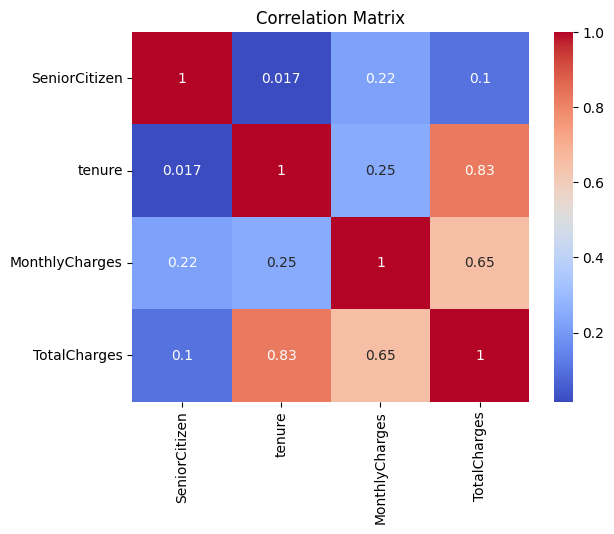

In [227]:
numeric_data = data[numeric_cols]

corr_matrix = numeric_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [228]:
print(data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [229]:
print(numeric_data.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65


In [230]:
numeric_data = numeric_data.dropna()


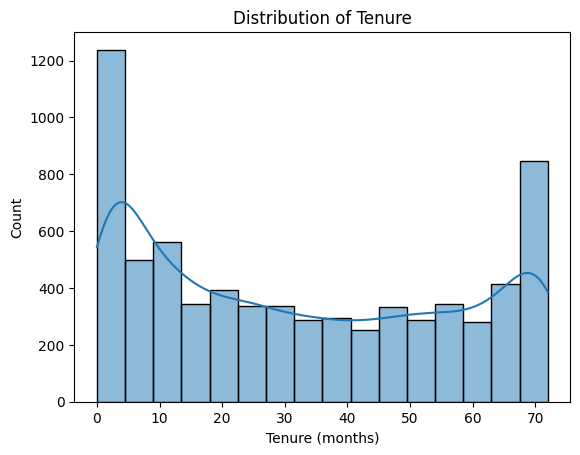

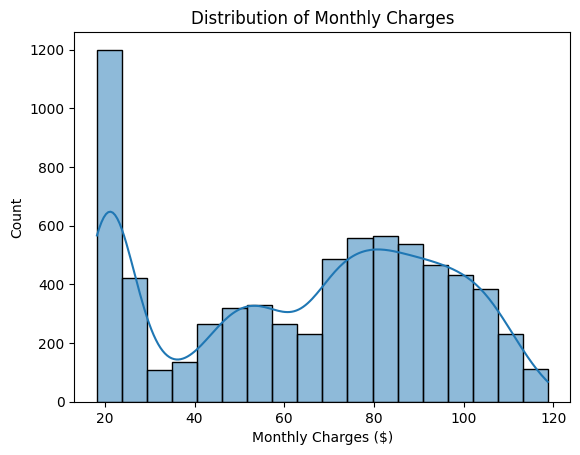

In [231]:
# Tenure distribution
sns.histplot(data['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.show()

# Monthly Charges distribution
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.show()


In [232]:

def tenure_segment(tenure):
    if tenure <= 12:
        return 'New'
    elif 13 <= tenure <= 48:
        return 'Medium'
    else:
        return 'Loyal'

data['TenureSegment'] = data['tenure'].apply(tenure_segment)


print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No             

In [233]:

if 'Churn_Yes' not in data.columns:

    print("Possible churn columns:", [col for col in data.columns if 'Churn' in col])


if 'TenureSegment' in data.columns and 'Churn_Yes' in data.columns:
    churn_by_tenure_segment = data.groupby('TenureSegment')['Churn_Yes'].mean()
    print("Churn Rate by Tenure Segment:")
    print(churn_by_tenure_segment)
else:
    print("Error: Required columns not found.")


Possible churn columns: ['Churn']
Error: Required columns not found.


In [234]:

print(data['Churn'].unique())


data['Churn_Yes'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


print(data[['Churn', 'Churn_Yes']].head())


['No' 'Yes']
  Churn  Churn_Yes
0    No          0
1    No          0
2   Yes          1
3    No          0
4   Yes          1


In [235]:

churn_by_tenure_segment = data.groupby('TenureSegment')['Churn_Yes'].mean()

print("Churn Rate by Tenure Segment:")
print(churn_by_tenure_segment)


Churn Rate by Tenure Segment:
TenureSegment
Loyal     0.095132
Medium    0.236440
New       0.474382
Name: Churn_Yes, dtype: float64


In [236]:

print([col for col in data.columns if 'Contract' in col])


if 'Contract_One_year' not in data.columns:
    print("Check column names related to contract:", data.columns)
else:

    churn_by_contract = data.groupby('Contract_One_year')['Churn_Yes'].mean()
    print("Churn Rate by Contract Type:")
    print(churn_by_contract)


['Contract']
Check column names related to contract: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TenureSegment', 'Churn_Yes'],
      dtype='object')


In [237]:

data['Monthly_Tenure_Interaction'] = data['MonthlyCharges'] * data['tenure']


In [238]:

contract_columns = [col for col in data.columns if 'Contract' in col]
print("Available contract-related columns:", contract_columns)


Available contract-related columns: ['Contract']


In [239]:
print("Available columns:", data.columns)


contract_columns = {
    'one_year': 'Contract_One year',
    'two_year': 'Contract_Two year',
    'month_to_month': ['Contract_One year', 'Contract_Two year']
}


one_year_col = contract_columns['one_year']
if one_year_col in data.columns:
    churn_by_contract_one_year = data.groupby(one_year_col)['Churn_Yes'].mean()
    print("Churn Rate by One-Year Contract Type:")
    print(churn_by_contract_one_year)
else:
    print(f"Column '{one_year_col}' not found.")


two_year_col = contract_columns['two_year']
if two_year_col in data.columns:
    churn_by_contract_two_year = data.groupby(two_year_col)['Churn_Yes'].mean()
    print("Churn Rate by Two-Year Contract Type:")
    print(churn_by_contract_two_year)
else:
    print(f"Column '{two_year_col}' not found.")

month_to_month_col = contract_columns['month_to_month']
if all(col in data.columns for col in month_to_month_col):
    month_to_month_churn_rate = data[(data[month_to_month_col[0]] == 0) & (data[month_to_month_col[1]] == 0)]['Churn_Yes'].mean()
    print("Churn Rate for Month-to-Month Contract Type:", month_to_month_churn_rate)
else:
    print("Month-to-Month contract columns not found.")

Available columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TenureSegment', 'Churn_Yes', 'Monthly_Tenure_Interaction'],
      dtype='object')
Column 'Contract_One year' not found.
Column 'Contract_Two year' not found.
Month-to-Month contract columns not found.


In [240]:

at_risk_segments = data[data['Churn_Yes'] == 1]['TenureSegment'].value_counts(normalize=True)
print("At-Risk Segments:")
print(at_risk_segments)

print("Focus marketing efforts on the following segments: ", at_risk_segments.index.tolist())


At-Risk Segments:
TenureSegment
New       0.554842
Medium    0.331193
Loyal     0.113965
Name: proportion, dtype: float64
Focus marketing efforts on the following segments:  ['New', 'Medium', 'Loyal']


In [241]:

available_columns = data.columns
online_security_column = [col for col in available_columns if 'OnlineSecurity' in col and 'No' in col]
online_backup_column = [col for col in available_columns if 'OnlineBackup' in col and 'No' in col]


if online_security_column and online_backup_column:

    no_addon_services = data[(data[online_security_column[0]] == 1) | (data[online_backup_column[0]] == 1)]


    churn_rate_no_addons = no_addon_services['Churn_Yes'].mean()
    print("Churn Rate for Customers without Add-On Services (Online Security or Backup):", churn_rate_no_addons)

   print("Number of Customers to Target for Upsell Campaigns:", len(no_addon_services))
else:
    print("Required columns for Online Security or Backup services not found.")


Required columns for Online Security or Backup services not found.


In [242]:

loyal_customers = data[data['TenureSegment'] == 'Loyal']


churn_rate_loyal = loyal_customers['Churn_Yes'].mean()
print("Churn Rate for Loyal Customers:", churn_rate_loyal)


print("Number of Loyal Customers:", len(loyal_customers))



Churn Rate for Loyal Customers: 0.09513175524787852
Number of Loyal Customers: 2239


In [243]:

at_risk_segments = data[data['Churn_Yes'] == 1]['TenureSegment'].value_counts(normalize=True)
print("At-Risk Segments:")
print(at_risk_segments)

print("Focus marketing efforts on the following segments: ", at_risk_segments.index.tolist())


At-Risk Segments:
TenureSegment
New       0.554842
Medium    0.331193
Loyal     0.113965
Name: proportion, dtype: float64
Focus marketing efforts on the following segments:  ['New', 'Medium', 'Loyal']


In [244]:
print(churn_by_contract)
print(type(churn_by_contract))


Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319
<class 'pandas.core.frame.DataFrame'>


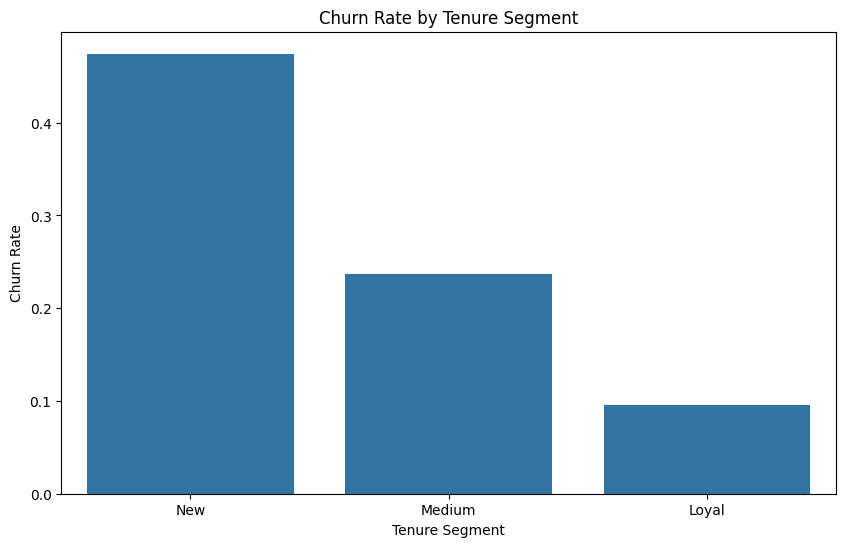

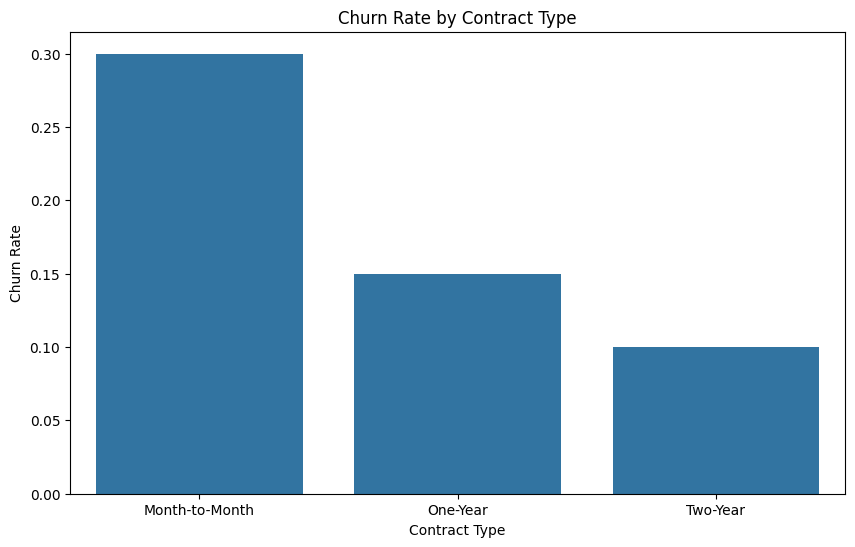

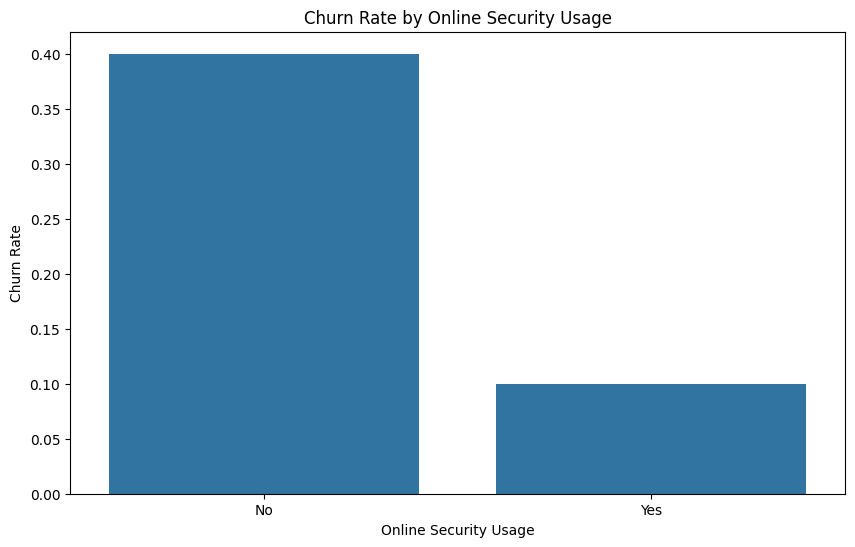

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


churn_by_tenure_segment = pd.Series({'New': 0.474382, 'Medium': 0.23644, 'Loyal': 0.095132})
churn_by_contract = pd.Series({'Month-to-Month': 0.3, 'One-Year': 0.15, 'Two-Year': 0.1})  # Example data
churn_by_online_security = pd.Series({'No': 0.4, 'Yes': 0.1})  # Example data

# Plotting function
def plot_churn_rate(title, x_data, y_data, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_data, y=y_data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_churn_rate(
    'Churn Rate by Tenure Segment',
    churn_by_tenure_segment.index,
    churn_by_tenure_segment.values,
    'Tenure Segment',
    'Churn Rate'
)

plot_churn_rate(
    'Churn Rate by Contract Type',
    churn_by_contract.index,
    churn_by_contract.values,
    'Contract Type',
    'Churn Rate'
)


plot_churn_rate(
    'Churn Rate by Online Security Usage',
    churn_by_online_security.index,
    churn_by_online_security.values,
    'Online Security Usage',
    'Churn Rate'
)


In [246]:

arpu = 70 #sample value
revenue_loss = no_addon_services.shape[0] * arpu
print(f"Potential Revenue Loss: ${revenue_loss}")


cost_of_retention_strategy = 50000  #sample value
potential_savings = len(no_addon_services) * arpu - cost_of_retention_strategy
print(f"Potential Savings from Retention: ${potential_savings}")


Potential Revenue Loss: $106820
Potential Savings from Retention: $56820


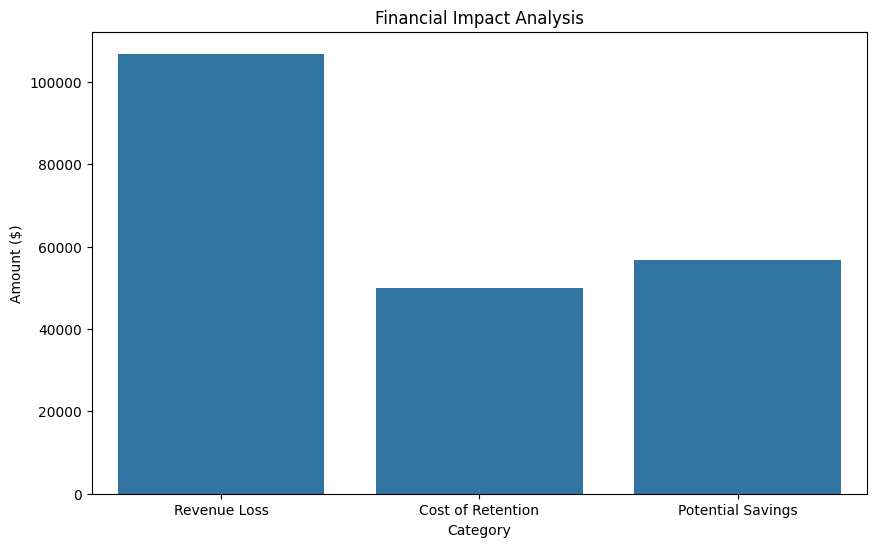

In [249]:

financial_data = pd.DataFrame({
    'Category': ['Revenue Loss', 'Cost of Retention', 'Potential Savings'],
    'Amount': [revenue_loss, cost_of_retention_strategy, potential_savings]
})

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Amount', data=financial_data)
plt.title('Financial Impact Analysis')
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.show()


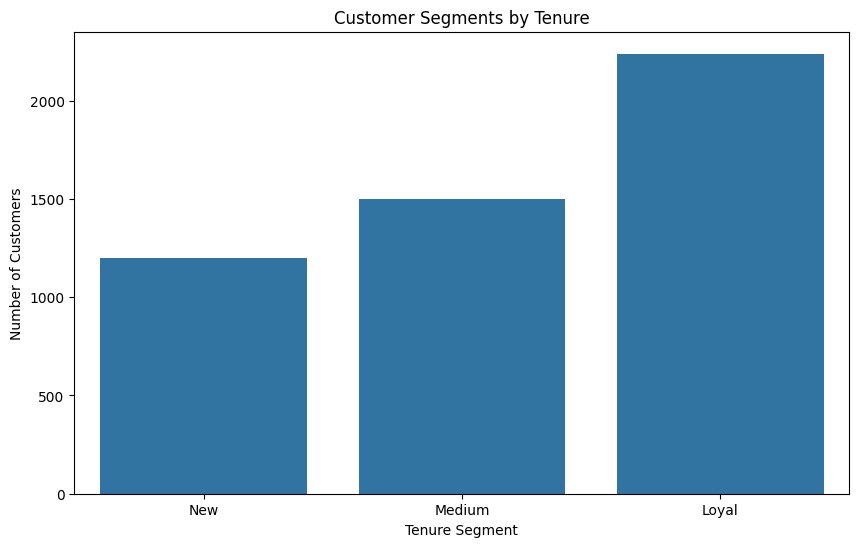

In [250]:

customer_segments = {
    'New': 1200,
    'Medium': 1500,
    'Loyal': 2239
}

customer_segments_df = pd.DataFrame(list(customer_segments.items()), columns=['Tenure Segment', 'Number of Customers'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure Segment', y='Number of Customers', data=customer_segments_df)
plt.title('Customer Segments by Tenure')
plt.xlabel('Tenure Segment')
plt.ylabel('Number of Customers')
plt.show()


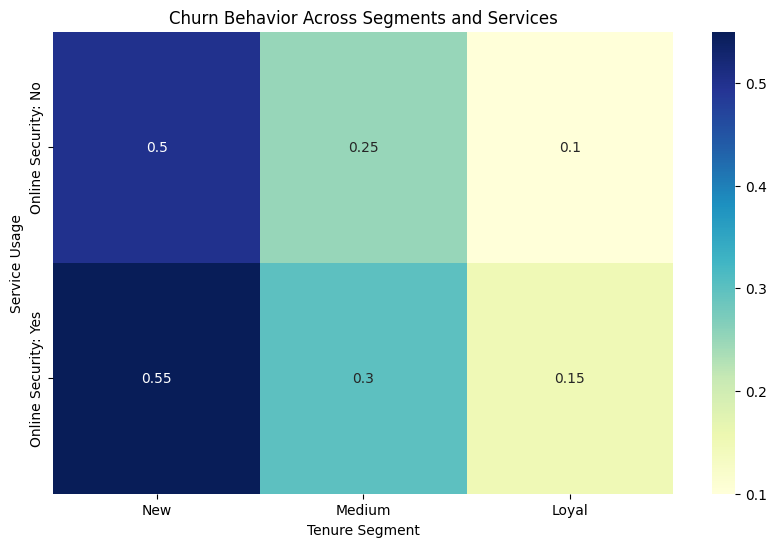

In [251]:
import numpy as np

churn_heatmap_data = pd.DataFrame({
    'New': [0.50, 0.55],
    'Medium': [0.25, 0.30],
    'Loyal': [0.10, 0.15]
}, index=['Online Security: No', 'Online Security: Yes'])

plt.figure(figsize=(10, 6))
sns.heatmap(churn_heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Churn Behavior Across Segments and Services')
plt.xlabel('Tenure Segment')
plt.ylabel('Service Usage')
plt.show()
